In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
wine = pd.read_csv('assets/wines.csv')

In [4]:
wine.head()

Fortified  Drywhite  Sweetwhite   Red   Rose  Sparkling      date
0       2585      1954          85   464  112.0       1686  Jan 1980
1       3368      2302          89   675  118.0       1591  Feb 1980
2       3210      3054         109   703  129.0       2304  Mar 1980
3       3111      2414          95   887   99.0       1712  Apr 1980
4       3756      2226          91  1139  116.0       1471  May 1980

/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_14848/4107401346.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wine.index = pd.to_datetime(wine.index)


<Axes: xlabel='date'>

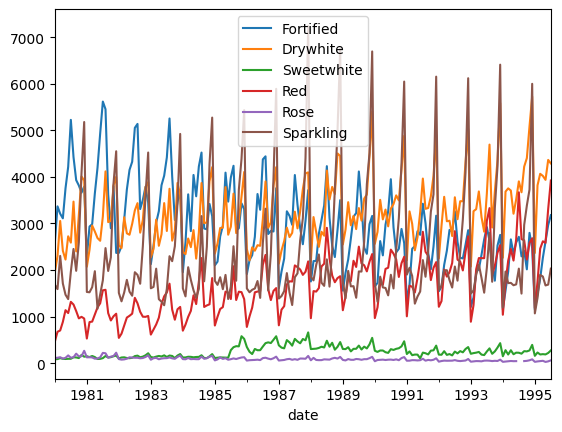

In [5]:
wine.set_index('date', inplace=True)
wine.index = pd.to_datetime(wine.index)

wine.plot()

In [6]:
from src.tde import MultivariateTDE

In [7]:
# predicting the next 3 steps
# using the last 3 observations
wine_tde = MultivariateTDE(wine, horizon=3, k=2, target_col='Red')
wine_tde.head()

Fortified-1  Fortified-0  Drywhite-1  Drywhite-0  Sweetwhite-1  \
date                                                                         
1980-03-01       2585.0       3368.0      1954.0      2302.0          85.0   
1980-04-01       3368.0       3210.0      2302.0      3054.0          89.0   
1980-05-01       3210.0       3111.0      3054.0      2414.0         109.0   
1980-06-01       3111.0       3756.0      2414.0      2226.0          95.0   
1980-07-01       3756.0       4216.0      2226.0      2725.0          91.0   

            Sweetwhite-0   Red-1   Red-0  Rose-1  Rose-0  Sparkling-1  \
date                                                                    
1980-03-01          89.0   464.0   675.0   112.0   118.0       1686.0   
1980-04-01         109.0   675.0   703.0   118.0   129.0       1591.0   
1980-05-01          95.0   703.0   887.0   129.0    99.0       2304.0   
1980-06-01          91.0   887.0  1139.0    99.0   116.0       1712.0   
1980-07-01          95.0  1139.0  1077.0   116.0   168.0       1471.0   

            Sparkling-0  Red+1   Red+2   Red+3  
date                                            
1980-03-01       1591.0    703   887.0  1139.0  
1980-04-01       2304.0    887  1139.0  1077.0  
1980-05-01       1712.0   1139  1077.0  1318.0  
1980-06-01       1471.0   1077  1318.0  1260.0  
1980-07-01       1377.0   1318  1260.0  1120.0

In [8]:
is_future = wine_tde.columns.str.contains('\+')
X = wine_tde.iloc[:,~is_future]
Y = wine_tde.iloc[:,is_future]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [11]:
X_train.head()

Fortified-1  Fortified-0  Drywhite-1  Drywhite-0  Sweetwhite-1  \
date                                                                         
1980-03-01       2585.0       3368.0      1954.0      2302.0          85.0   
1980-04-01       3368.0       3210.0      2302.0      3054.0          89.0   
1980-05-01       3210.0       3111.0      3054.0      2414.0         109.0   
1980-06-01       3111.0       3756.0      2414.0      2226.0          95.0   
1980-07-01       3756.0       4216.0      2226.0      2725.0          91.0   

            Sweetwhite-0   Red-1   Red-0  Rose-1  Rose-0  Sparkling-1  \
date                                                                    
1980-03-01          89.0   464.0   675.0   112.0   118.0       1686.0   
1980-04-01         109.0   675.0   703.0   118.0   129.0       1591.0   
1980-05-01          95.0   703.0   887.0   129.0    99.0       2304.0   
1980-06-01          91.0   887.0  1139.0    99.0   116.0       1712.0   
1980-07-01          95.0  1139.0  1077.0   116.0   168.0       1471.0   

            Sparkling-0  
date                     
1980-03-01       1591.0  
1980-04-01       2304.0  
1980-05-01       1712.0  
1980-06-01       1471.0  
1980-07-01       1377.0

In [12]:
Y_train.head()

Red+1   Red+2   Red+3
date                             
1980-03-01    703   887.0  1139.0
1980-04-01    887  1139.0  1077.0
1980-05-01   1139  1077.0  1318.0
1980-06-01   1077  1318.0  1260.0
1980-07-01   1318  1260.0  1120.0

In [13]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [15]:
forecasts = model.predict(X_test)
forecasts[:5]

array([[2062.28, 2175.15, 2051.78],
       [2194.49, 2230.37, 2064.31],
       [2058.31, 2195.46, 1864.62],
       [2107.52, 1336.37, 1483.89],
       [1147.88, 1268.51, 1548.14]])

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(Y_test, forecasts)

411.2425308641975

In [18]:
np.abs(Y_test-forecasts).mean()

Red+1    369.599444
Red+2    412.502963
Red+3    451.625185
dtype: float64

In [19]:
np.abs(Y_test-forecasts).mean().mean()

411.2425308641975